## Load library

In [8]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import sklearn.decomposition, sklearn.cluster
from nheatmap import nhm, scripts
import matplotlib.pyplot as plt
import matplotlib as mpl

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Generate Data

In [9]:
df = scripts.simulate_data(nrows=120)
nrows, ncols = np.shape(df)
pc = sklearn.decomposition.PCA().fit(df)
dfr = pd.DataFrame(pc.transform(df)[:, 0], index=['sample '+str(x) for x in np.arange(1, nrows+1)],
        columns=['PC1'])
dfr['cell cluster'] = sklearn.cluster.KMeans(n_clusters=20).fit_predict(df).astype(str)
dfc = pd.DataFrame(pc.components_[0], index=['gene '+str(x) for x in
    np.arange(1, ncols+1)], columns=['PC score'])
dfc['gene cluster'] = sklearn.cluster.KMeans(n_clusters=10).fit_predict(df.T).astype(str)
dfc['PC score 2'] = pc.components_[1]
cmaps={'cell cluster':'Paired', 'PC1':'RdYlGn', 'gene cluster':'inferno',
        'PC score':'gist_heat', 'PC score 2':'rainbow'}
dfsmall = df.iloc[:20, :10]
dfrsmall = dfr.iloc[:20]
dfcsmall = dfr.iloc[:10]

In [10]:
df.head()

,gene 1,gene 2,gene 3,gene 4,gene 5,gene 6,gene 7,gene 8,gene 9,gene 10,...,gene 51,gene 52,gene 53,gene 54,gene 55,gene 56,gene 57,gene 58,gene 59,gene 60
sample 1,3.440191,6.687903,6.753143,6.759349,6.660276,2.808119,6.752167,2.483846,6.725881,2.973276,...,3.029742,2.966452,1.959745,2.630191,0.145131,3.382448,3.060431,8.254469,1.505376,2.096265
sample 2,8.255515,2.595986,3.247687,6.728570,6.793792,1.169576,3.049521,7.682608,6.755299,6.694446,...,1.928102,1.624685,3.315093,1.162031,2.740221,3.250106,2.682027,0.884640,3.374532,6.726140
sample 3,0.178331,2.889911,6.742382,2.229009,6.750827,6.738531,6.661236,6.740381,7.679748,6.722920,...,0.255832,3.207071,1.946651,2.020463,2.911568,2.897907,6.768131,6.713658,2.871444,2.784039
sample 4,3.216024,1.163863,2.216335,6.721611,2.099566,2.459537,1.195301,8.279926,1.655817,3.411639,...,2.548274,2.181051,3.246450,2.971615,1.930585,1.998736,2.798301,3.316870,2.111170,7.668649
sample 5,8.673020,6.722064,6.675113,6.771206,6.677779,3.089657,8.255457,7.652367,3.244808,6.747257,...,1.572799,0.332964,1.280124,0.537492,1.024301,0.889290,2.880512,2.566002,2.320565,8.275645


In [11]:
dfr.head()

,PC1,cell cluster
sample 1,6.045749,8
sample 2,7.035737,6
sample 3,9.857020,3
sample 4,5.942945,8
sample 5,13.396642,8


In [12]:
dfc.head()

,PC score,gene cluster,PC score 2
gene 1,0.166637,0,-0.061479
gene 2,0.191703,0,-0.059902
gene 3,0.152162,0,-0.066685
gene 4,0.163395,2,-0.086957
gene 5,0.165930,0,-0.079261


## Make some plots

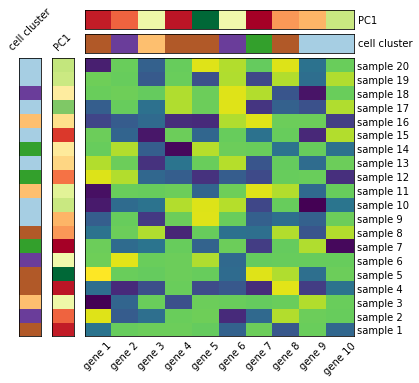

In [13]:
g = nhm(data=dfsmall, dfr=dfrsmall, dfc=dfcsmall, figsize=(6, 6), linewidths=0, cmaps=cmaps,
                 show_cbar=False)
fig, plots = g.run()

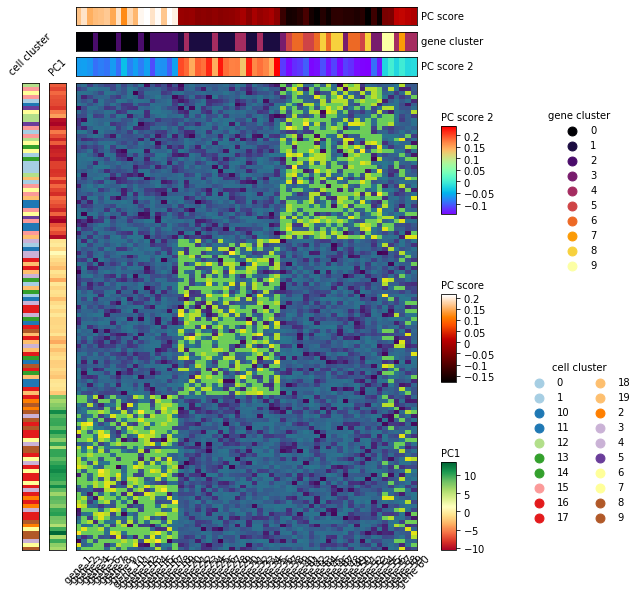

In [14]:
g = nhm(data=df, dfr=dfr, dfc=dfc, figsize=(10, 10), linewidths=0, cmaps=cmaps)
fig, plots = g.run()

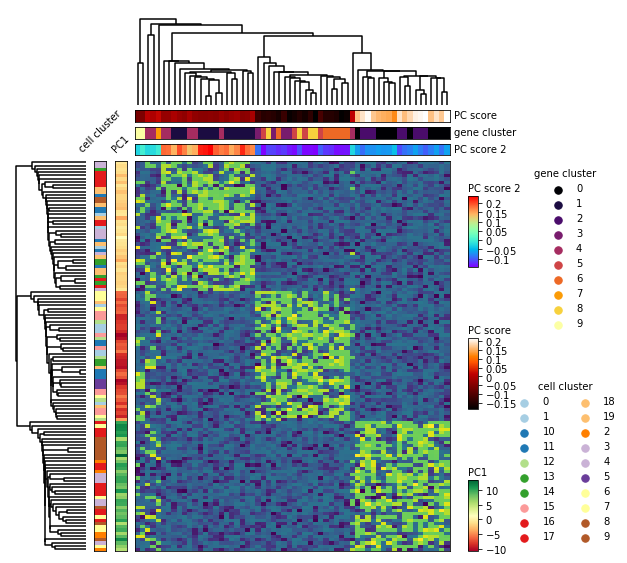

In [15]:
g = nhm(data=df, dfr=dfr, dfc=dfc, figsize=(10, 10), linewidths=0, cmaps=cmaps, showxticks=False)
g.hcluster()
fig, plots = g.run()